# Time-frequency analysis of grand LFP mean

Here, we take the mean across all (normalized) channels across all subjects of the peri-event LFP response.

In [1]:
import numpy as np
import pandas as pd
import physutils as phys
import physutils.bootstrap as boot
import physutils.tf as tf
import matplotlib.pyplot as plt
import dbio

%matplotlib inline
np.random.seed(12346)

In [2]:
from time_frequency_helpers import *

In [3]:
# data location
dbname = 'data/bart.hdf5'

# get list of (patient, dataset) tuples to plot
dsets = pd.read_csv('data/lfp_channel_file.csv', header=None).iloc[:, :2].drop_duplicates()

In [13]:
Tpre = -2.5
Tpost = 1.5
freqs = np.exp(np.linspace(np.log(2.5), np.log(50)))
niter = 100
thresh = (0.025, 0.975)
clim = (-3, 3)
baseline_interval = (-2, -1.5)  # (-1.5, -1.35)
nf = phys.norm_by_mean(baseline_interval)

In [14]:
tuplist = [(16, 2), (17, 2), (18, 1), (20, 1), (22, 1), (23, 1), (30, 1)]

# Contrast stops - pops

In [15]:
spectra, labels, taxis, faxis = get_spectra_and_labels(dbname, tuplist,
                                    ['stops', 'pops'], Tpre, Tpost, freqs, normfun=nf)

(16, 2)
(17, 2)
(18, 1)
(20, 1)
(22, 1)
(23, 1)
(30, 1)


In [16]:
ss = np.array(spectra)
img0 = np.mean(ss[labels == 0], axis=0)
img1 = np.mean(ss[labels == 1], axis=0)
cont = img0/img1

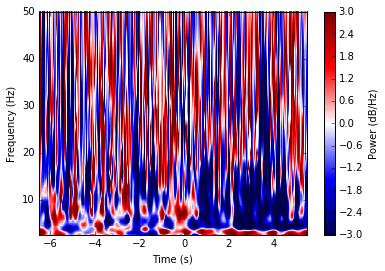

In [17]:
T = len(taxis)
make_plot(cont, taxis, faxis, rasterized=True, cmap='seismic', clim=clim);

In [ ]:
%%time

contrast0, fig = significant_time_frequency(dbname, tuplist, ['stops', 'pops'], 
                                           Tpre, Tpost,
                                           freqs, thresh, normfun=nf, niter=niter, 
                                           rasterized=True, cmap='seismic', clim=clim);

# decorations
plt.axvline(x=0, color='k')
plt.text(0.05, 45, 'Stop', fontweight='bold')

plt.title('Contrast: Stop - Pop')

plt.tick_params(axis='x', which='both', top='off');

# Control for motor movement

Free stops and starts contain the same joystick response.

(16, 2)
(17, 2)
(18, 1)
(20, 1)
(22, 1)
(23, 1)
(30, 1)
CPU times: user 5h 35min 7s, sys: 32.9 s, total: 5h 35min 39s
Wall time: 5h 35min 40s


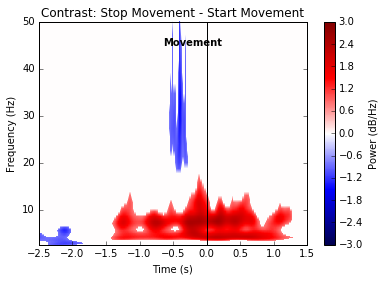

In [10]:
%%time
contrast1, fig = significant_time_frequency(dbname, tuplist, ['stops_free', 'starts'], 
                                           Tpre, Tpost,
                                           freqs, thresh, normfun=nf, niter=niter, 
                                           rasterized=True, cmap='seismic', clim=clim);

# decorations
plt.axvline(x=0, color='k')
plt.text(-0.65, 45, 'Movement', fontweight='bold')

plt.title('Contrast: Stop Movement - Start Movement')

plt.tick_params(axis='x', which='both', top='off');

# Contrast voluntary and involuntary stops

(16, 2)
Dataset (16, 2) has no events of type stops_control
(17, 2)
Dataset (17, 2) has no events of type stops_control
(18, 1)
Dataset (18, 1) has no events of type stops_control
(20, 1)
(22, 1)
(23, 1)
(30, 1)
CPU times: user 1h 48min 23s, sys: 4.23 s, total: 1h 48min 27s
Wall time: 1h 48min 19s


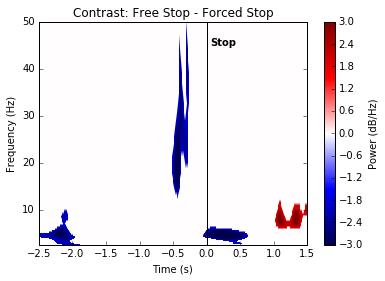

In [11]:
%%time
contrast2, fig = significant_time_frequency(dbname, tuplist, ['stops_free', 'stops_control'], Tpre, Tpost,
                           freqs, thresh, normfun=nf, niter=niter, 
                           rasterized=True, cmap='seismic', clim=clim);

# decorations
plt.axvline(x=0, color='k')
plt.text(0.05, 45, 'Stop', fontweight='bold')

plt.title('Contrast: Free Stop - Forced Stop')

plt.tick_params(axis='x', which='both', top='off');